In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import timedelta
import seaborn as sns

import sklearn 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from numpy import absolute
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


!pip install pymrmr
!pip install git+https://github.com/smazzanti/mrmr


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.6 MB/s 
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp37-cp37m-linux_x86_64.whl size=276660 sha256=0fd3a2546c3de295ae0150c6d6e9e48cd5ab366679da1bc9c98b6e46bb759e3f
  Stored in directory: /root/.cache/pip/wheels/81/95/66/05731ac334bc74a1251a727af18eb28dc027217ee817a0cab6
Successfully built pymrmr
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/smazzanti/mrmr to /tmp/pip-req-build-5vxth0x5
  Running command git clone -q https://github.com/smazzanti/mrmr /tmp/pip-req-build-5vxth0x5
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


# **Dataset details**

In [2]:
df=pd.read_csv('MumbaiFinalAG.csv')

In [3]:
print("Size/Shape of the dataset: ",df.shape)
print("Checking for null values:\n",df.isnull().sum())
print("Checking Data-type of each column:\n",df.dtypes)

Size/Shape of the dataset:  (132, 18)
Checking for null values:
 INDEX          72
YEAR            0
MN              0
Date           72
MMAX            0
MMIN            0
TMRF            0
RH              0
MWS             0
<14YRS(M)       0
15-24YRS(M)     0
25-60YRS(M)     0
>60YRS(M)       0
<14YRS(F)       0
15-24YRS(F)     0
25-60YRS(F)     0
>60YRS(F)       0
 Total DI       0
dtype: int64
Checking Data-type of each column:
 INDEX          float64
YEAR             int64
MN               int64
Date            object
MMAX           float64
MMIN           float64
TMRF           float64
RH             float64
MWS            float64
<14YRS(M)        int64
15-24YRS(M)      int64
25-60YRS(M)      int64
>60YRS(M)        int64
<14YRS(F)        int64
15-24YRS(F)      int64
25-60YRS(F)      int64
>60YRS(F)        int64
 Total DI        int64
dtype: object


# **Data Cleaning**

In [4]:
dataset = df.copy()

In [5]:
cols = ['INDEX','YEAR','Date']
dataset.drop(cols, axis = 1, inplace = True)

In [ ]:
d = (dataset.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]] ).corr(method='pearson')
d

,MMAX,MMIN,TMRF,RH,MWS,<14YRS(M),15-24YRS(M),25-60YRS(M),>60YRS(M),<14YRS(F),15-24YRS(F),25-60YRS(F),>60YRS(F)
MMAX,1.000000,0.237687,-0.245258,-0.361032,-0.316699,-0.281783,-0.186954,-0.270622,-0.136239,-0.198210,-0.186025,-0.203912,-0.045605
MMIN,0.237687,1.000000,0.058483,-0.019842,0.390635,0.059904,0.218233,0.109366,-0.043269,0.111925,0.154558,0.131983,0.207060
TMRF,-0.245258,0.058483,1.000000,0.422504,-0.121943,0.144041,0.052709,0.094602,-0.042733,0.136251,0.010662,0.084675,-0.032041
RH,-0.361032,-0.019842,0.422504,1.000000,-0.252027,0.316756,0.260743,0.291236,0.021346,0.302868,0.276956,0.310908,0.093034
MWS,-0.316699,0.390635,-0.121943,-0.252027,1.000000,0.065802,0.105607,0.082097,-0.048044,0.027709,0.051078,-0.000625,0.053456
<14YRS(M),-0.281783,0.059904,0.144041,0.316756,0.065802,1.000000,0.844178,0.891727,0.432957,0.788823,0.764828,0.841134,0.490349
15-24YRS(M),-0.186954,0.218233,0.052709,0.260743,0.105607,0.844178,1.000000,0.932140,0.443670,0.734237,0.866769,0.876776,0.460718
25-60YRS(M),-0.270622,0.109366,0.094602,0.291236,0.082097,0.891727,0.932140,1.000000,0.495400,0.754560,0.883164,0.883259,0.449159
>60YRS(M),-0.136239,-0.043269,-0.042733,0.021346,-0.048044,0.432957,0.443670,0.495400,1.000000,0.395399,0.473155,0.453493,0.224818
<14YRS(F),-0.198210,0.111925,0.136251,0.302868,0.027709,0.788823,0.734237,0.754560,0.395399,1.000000,0.658398,0.730999,0.458653


# **Handling Missing Values**

In [ ]:
dataset.isnull().sum()

MN             0
MMAX           0
MMIN           0
TMRF           0
RH             0
MWS            0
<14YRS(M)      0
15-24YRS(M)    0
25-60YRS(M)    0
>60YRS(M)      0
<14YRS(F)      0
15-24YRS(F)    0
25-60YRS(F)    0
>60YRS(F)      0
 Total DI      0
dtype: int64

In [ ]:
dataset['<14YRS(M)']=dataset['<14YRS(M)'].fillna(dataset['<14YRS(M)'].mode()[0])
dataset['15-24YRS(M)']=dataset['15-24YRS(M)'].fillna(dataset['15-24YRS(M)'].mode()[0])
dataset['25-60YRS(M)']=dataset['25-60YRS(M)'].fillna(dataset['25-60YRS(M)'].mode()[0])
dataset['>60YRS(M)']=dataset['>60YRS(M)'].fillna(dataset['>60YRS(M)'].mode()[0])

dataset['<14YRS(F)']=dataset['<14YRS(F)'].fillna(dataset['<14YRS(F)'].mode()[0])
dataset['15-24YRS(F)']=dataset['15-24YRS(F)'].fillna(dataset['15-24YRS(F)'].mode()[0])
dataset['25-60YRS(F)']=dataset['25-60YRS(F)'].fillna(dataset['25-60YRS(F)'].mode()[0])
dataset['>60YRS(F)']=dataset['>60YRS(F)'].fillna(dataset['>60YRS(F)'].mode()[0])

In [ ]:
dataset.isnull().sum()

MN             0
MMAX           0
MMIN           0
TMRF           0
RH             0
MWS            0
<14YRS(M)      0
15-24YRS(M)    0
25-60YRS(M)    0
>60YRS(M)      0
<14YRS(F)      0
15-24YRS(F)    0
25-60YRS(F)    0
>60YRS(F)      0
 Total DI      0
dtype: int64

# **Outlier Detection**

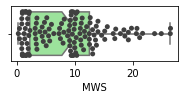

In [6]:
plt.figure(figsize=(3,1))
sns.boxplot(dataset['MWS'], color="lightgreen", notch=True)
sns.swarmplot(dataset['MWS'], color=".25")

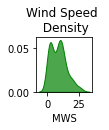

In [7]:

plt.figure(figsize=(1,1))
ws = sns.kdeplot(dataset['MWS'], shade=True, color='green', alpha=.7)
ws.set(ylabel=None)
plt.title('Wind Speed \n Density')
plt.show()

In [8]:
import statistics  
mode = statistics.mean(dataset['MWS'])
print(mode)
mean = np.mean(dataset['MWS'])
sd = np.std(dataset['MWS'])
threshold = 2.5
outliers = []
for i in dataset['MWS']:
  z = (i - mean) / sd
  if abs(z) > threshold:
    outliers.append(i)
    dataset['MWS'] = dataset['MWS'].replace(i,mean)
print(outliers)


8.723560606060605
[24.9, 26.45, 26.48]


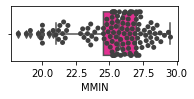

In [9]:
plt.figure(figsize=(3,1))
sns.boxplot(dataset['MMIN'], color="deeppink", notch=True)
sns.swarmplot(dataset['MMIN'], color=".25")

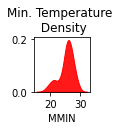

In [10]:
plt.figure(figsize=(1,1))
min = sns.kdeplot(dataset['MMIN'], shade=True, color='red', alpha=.9)
min.set(ylabel=None)
plt.title('Min. Temperature \n Density')
plt.show()

In [11]:
mean = statistics.mean(dataset['MMIN'])
print(mean)
mean = np.mean(dataset['MMIN'])
sd = np.std(dataset['MMIN'])
threshold = 2.5
outliers = []
for i in dataset['MMIN']:
  z = (i - mean) / sd
  if abs(z) > threshold:
    outliers.append(i)
    dataset['MMIN'] = dataset['MMIN'].replace(i,mean)
print(outliers)

25.31022727272727
[18.8, 18.2, 19.1]


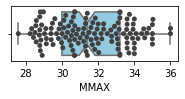

In [ ]:
plt.figure(figsize=(3,1))
sns.boxplot(dataset['MMAX'], color="skyblue", notch=True)
sns.swarmplot(dataset['MMAX'], color=".25")

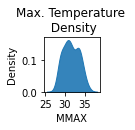

In [ ]:
plt.figure(figsize=(1,1))
sns.kdeplot(dataset['MMAX'], shade=True, alpha=.9)
plt.title('Max. Temperature \n Density')
plt.show()

In [12]:
mean = statistics.mean(dataset['MMAX'])
print(mean)
mean = np.mean(dataset['MMAX'])
sd = np.std(dataset['MMAX'])
threshold = 2.5
outliers = []
for i in dataset['MMAX']:
  z = (i - mean) / sd
  if abs(z) > threshold:
    outliers.append(i)
    dataset['MMAX'] = dataset['MMAX'].replace(i,mean)
print(outliers)

31.559848484848484
[]


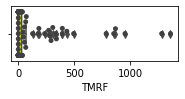

In [ ]:
plt.figure(figsize=(3,1))
sns.boxplot(dataset['TMRF'], color="yellow", notch=True,)
sns.swarmplot(dataset['TMRF'], color=".25")

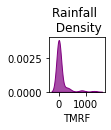

In [ ]:
plt.figure(figsize=(1,1))
tm = sns.kdeplot(dataset['TMRF'], shade=True, color='purple', alpha=.7)
tm.set(ylabel=None)
plt.title('Rainfall \n Density')
plt.show()

In [13]:
mean = statistics.mean(dataset['TMRF'])
print(mean)
mean = np.mean(dataset['TMRF'])
sd = np.std(dataset['TMRF'])
threshold = 2.5
outliers = []
for i in dataset['TMRF']:
  z = (i - mean) / sd
  if abs(z) > threshold:
    outliers.append(i)
    dataset['TMRF'] = dataset['TMRF'].replace(i,mean)
print(outliers)

85.79878787878788
[1278.2, 783.3, 951.3, 850.6, 1356.9, 866.3]


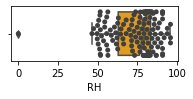

In [ ]:
plt.figure(figsize=(3,1))
sns.boxplot(dataset['RH'], color="orange", notch=True)
sns.swarmplot(dataset['RH'], color=".25")

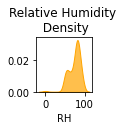

In [ ]:
plt.figure(figsize=(1,1))
rh = sns.kdeplot(dataset['RH'], shade=True, color='orange', alpha=.7
                 )
rh.set(ylabel=None)
plt.title('Relative Humidity \n Density')
plt.show()

In [14]:
mean = statistics.mean(dataset['RH'])
print(mean)
mean = np.mean(dataset['RH'])
sd = np.std(dataset['RH'])
threshold = 2.5
outliers = []
for i in dataset['RH']:
  z = (i - mean) / sd
  if abs(z) > threshold:
    outliers.append(i)
    dataset['RH'] = dataset['RH'].replace(i,mode)
print(outliers)

73.985
[0.0]


# **Feature Plot**

Text(0.5, 1.0, 'Feature plot for Climatic Variables and Male Age groups for Mumbai City \n')

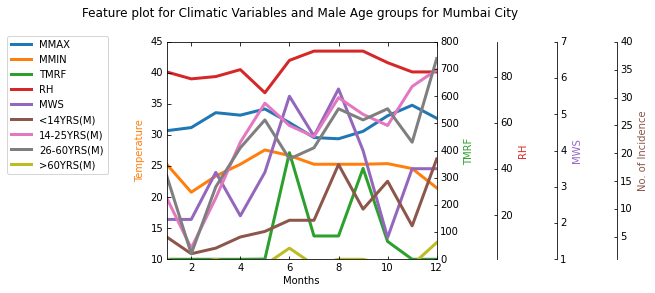

In [ ]:
from mpl_toolkits.axes_grid1 import host_subplot 
import mpl_toolkits.axisartist as AA 
import matplotlib.pyplot as plt

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
par4 = host.twinx()

offset = 180
new_fixed_axis = par4.get_grid_helper().new_fixed_axis
par4.axis["right"] = new_fixed_axis(loc="right",
                                    axes=par4,
                                    offset=(offset, 0))

offset = 120
new_fixed_axis = par3.get_grid_helper().new_fixed_axis
par3.axis["right"] = new_fixed_axis(loc="right",
                                    axes=par3,
                                    offset=(offset, 0))

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right",
                                    axes=par2,
                                    offset=(offset, 0))

par1.axis["right"].toggle(all=True)

host.set_xlim(1, 12)
host.set_ylim(10, 45)

host.set_xlabel("Months")
host.set_ylabel("Temperature")
par1.set_ylabel("TMRF")
par2.set_ylabel("RH")
par3.set_ylabel("MWS")
par4.set_ylabel("No. of Incidence")

month = dataset.iloc[0:12,0]

mmax = dataset.iloc[0:12,1]

mmin = dataset.iloc[0:12,2]

tmrf = dataset.iloc[0:12,3]

rh = dataset.iloc[0:12,4]

mws = dataset.iloc[0:12,5]

nod = dataset.iloc[0:12,6]

nod1 = dataset.iloc[0:12,7]

nod2 = dataset.iloc[0:12,8]

nod3 = dataset.iloc[0:12,9]

p1, = host.plot(month, mmax, label="MMAX", linewidth=3.0)
p2, = host.plot(month, mmin, label="MMIN", linewidth=3.0)
p3, = par1.plot(month, tmrf, label="TMRF", linewidth=3.0)
p4, = par2.plot(month, rh, label = "RH", linewidth=3.0)
p5, = par3.plot(month, mws, label = "MWS", linewidth=3.0)
p6, = par4.plot(month, nod, label="<14YRS(M)", linewidth=3.0)
p7, = par4.plot(month, nod1, label="14-25YRS(M)", linewidth=3.0)
p7, = par4.plot(month, nod2, label="26-60YRS(M)", linewidth=3.0)
p7, = par4.plot(month, nod3, label=">60YRS(M)", linewidth=3.0)

par1.set_ylim(0, 800)
par2.set_ylim(1, 95)
par3.set_ylim(1,7)
par4.set_ylim(1,40)

host.legend(bbox_to_anchor=(-0.2, 1.05))

host.axis["left"].label.set_color(p1.get_color())
host.axis["left"].label.set_color(p2.get_color())
par1.axis["right"].label.set_color(p3.get_color())
par2.axis["right"].label.set_color(p4.get_color())
par3.axis["right"].label.set_color(p5.get_color())
par4.axis["right"].label.set_color(p6.get_color())

plt.draw()
plt.title("Feature plot for Climatic Variables and Male Age groups for Mumbai City \n", pad=10)

Text(0.5, 1.0, 'Feature plot for Climatic Variables and Female Age groups for Mumbai City \n')

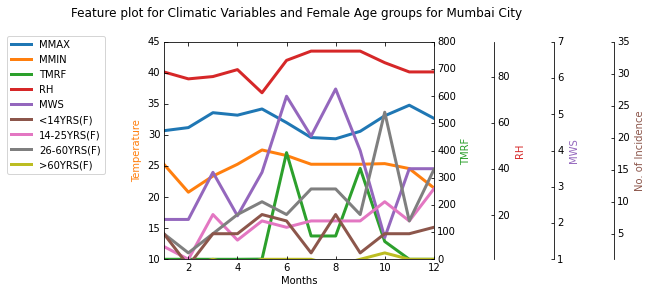

In [ ]:
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
par4 = host.twinx()

offset = 180
new_fixed_axis = par4.get_grid_helper().new_fixed_axis
par4.axis["right"] = new_fixed_axis(loc="right",
                                    axes=par4,
                                    offset=(offset, 0))

offset = 120
new_fixed_axis = par3.get_grid_helper().new_fixed_axis
par3.axis["right"] = new_fixed_axis(loc="right",
                                    axes=par3,
                                    offset=(offset, 0))

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right",
                                    axes=par2,
                                    offset=(offset, 0))

par1.axis["right"].toggle(all=True)

host.set_xlim(1, 12)
host.set_ylim(10, 45)

host.set_xlabel("Months")
host.set_ylabel("Temperature")
par1.set_ylabel("TMRF")
par2.set_ylabel("RH")
par3.set_ylabel("MWS")
par4.set_ylabel("No. of Incidence")

month = dataset.iloc[0:12,0]

mmax = dataset.iloc[0:12,1]

mmin = dataset.iloc[0:12,2]

tmrf = dataset.iloc[0:12,3]

rh = dataset.iloc[0:12,4]

mws = dataset.iloc[0:12,5]

nod = dataset.iloc[0:12,10]

nod1 = dataset.iloc[0:12,11]

nod2 = dataset.iloc[0:12,12]

nod3 = dataset.iloc[0:12,13]

p1, = host.plot(month, mmax, label="MMAX", linewidth=3.0)
p2, = host.plot(month, mmin, label="MMIN", linewidth=3.0)
p3, = par1.plot(month, tmrf, label="TMRF", linewidth=3.0)
p4, = par2.plot(month, rh, label = "RH", linewidth=3.0)
p5, = par3.plot(month, mws, label = "MWS", linewidth=3.0)
p6, = par4.plot(month, nod, label="<14YRS(F)", linewidth=3.0)
p7, = par4.plot(month, nod1, label="14-25YRS(F)", linewidth=3.0)
p7, = par4.plot(month, nod2, label="26-60YRS(F)", linewidth=3.0)
p7, = par4.plot(month, nod3, label=">60YRS(F)", linewidth=3.0)

par1.set_ylim(0, 800)
par2.set_ylim(1, 95)
par3.set_ylim(1,7)
par4.set_ylim(1,35)

host.legend(bbox_to_anchor=(-0.2, 1.05))

host.axis["left"].label.set_color(p1.get_color())
host.axis["left"].label.set_color(p2.get_color())
par1.axis["right"].label.set_color(p3.get_color())
par2.axis["right"].label.set_color(p4.get_color())
par3.axis["right"].label.set_color(p5.get_color())
par4.axis["right"].label.set_color(p6.get_color())

plt.draw()
plt.title("Feature plot for Climatic Variables and Female Age groups for Mumbai City \n", pad=10)

## **Correlation Analysis**

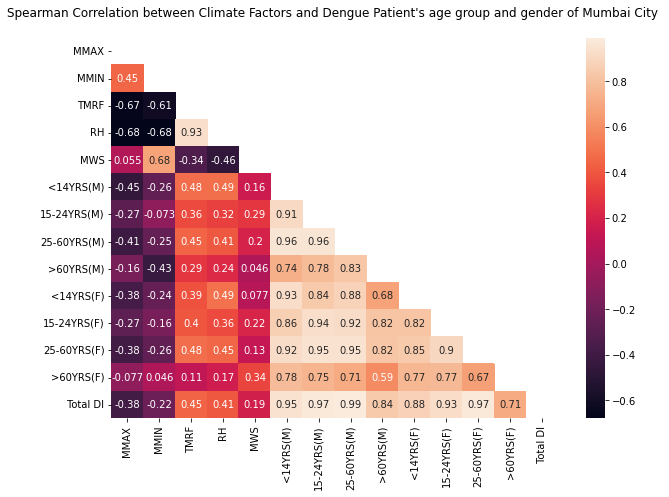

In [ ]:
d = (dataset.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14]] ).corr()
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_title('Spearman Correlation between Climate Factors and Dengue Patient\'s age group and gender of Mumbai City \n')
sns.heatmap(d.corr(method='spearman'), annot=True, mask=np.triu(d.corr(method='spearman')))

In [ ]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold=0.25) #Removing both constant and quasi-constant
var_thr.fit(dataset.iloc[:, [1,2,3,4,5]])

var_thr.get_support()

array([ True,  True,  True,  True,  True])

### **Multiple Linear Regression**


In [ ]:
X = dataset.iloc[:,[1,2,3,4,5]]
y = dataset.iloc[:,[6]]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size = 0.2, random_state = 0)


# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

y_pred =regressor_linear.predict(X_test)
from sklearn.metrics import max_error
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))
print ('MAE:',mean_absolute_error(y_test,y_pred))
print('R-SQUARED', r2_score(y_test, y_pred))



RMSE: 6.88779068570453
MAE: 5.649064462017367
R-SQUARED 0.16910987587865367


### **LASSO Regression**

In [ ]:
X = dataset.iloc[:,[1,2,3,4,5]]
y = dataset.iloc[:,[6]]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lasso_model = Lasso().fit(X_train,y_train)

y_pred = lasso_model.predict(X_test)

print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))
print ('MAE:',mean_absolute_error(y_test,y_pred))
print('R-SQUARED', r2_score(y_test, y_pred))

RMSE: 6.981791954543758
MAE: 5.82008835767874
R-SQUARED 0.1462759375463245


# **Support Vector Machine**

In [ ]:
X = dataset.iloc[:,[1,2,3,4,5]]
y = dataset.iloc[:,[6]]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size = 0.2, random_state = 0)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Svr_regressor = SVR(kernel = 'rbf')
Svr_regressor.fit(X_train, y_train)

y_pred =Svr_regressor.predict(X_test)

print ('MAE:',mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R-SQUARED', r2_score(y_test, y_pred))

MAE: 5.498435435084949
RMSE: 7.20253909485751
R-SQUARED 0.09143717321638578


### **Decision Tree**

In [ ]:
X = dataset.iloc[:,[1,2,3,4,5]]
y = dataset.iloc[:,[6]]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size = 0.2, random_state = 0)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regressor_decison = DecisionTreeRegressor(random_state = 10,criterion='mae',splitter='random')
regressor_decison.fit(X_train, y_train)

y_pred_decison =regressor_decison.predict(X_test)

rmse_decsion = np.sqrt(mean_squared_error(y_test,y_pred_decison))
Rsqure_descion =r2_score(y_test, y_pred_decison)
mean_absolute_error_desicon =mean_absolute_error(y_test, y_pred_decison)
print("Root Mean Sqaured Error:",rmse_decsion)
print("R-Sqaured Error:",Rsqure_descion)
print("Mean Absolute Error:",mean_absolute_error_desicon)

Root Mean Sqaured Error: 9.655165571973493
R-Sqaured Error: -0.6326878723813183
Mean Absolute Error: 8.25925925925926


**Elastic Model**

In [ ]:
X = dataset.iloc[:,[1,2,3,4,5]]
y = dataset.iloc[:,[6]]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size = 0.2, random_state = 0)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train, y_train)
y_pred_model =model.predict(X_test)
from sklearn import metrics
rmse_elastic = np.sqrt(metrics.mean_squared_error(y_test,y_pred_model))
Rsqure_elastic =r2_score(y_test, y_pred_model)
mean_absolute_error_elastic =metrics.mean_absolute_error(y_test, y_pred_model)
print("Root Mean Sqaured Error:",rmse_elastic)
print("R-Sqaured Error:",Rsqure_elastic)
print("Mean Absolute Error:",mean_absolute_error_elastic)

Root Mean Sqaured Error: 6.919829980973011
R-Sqaured Error: 0.16136194892603617
Mean Absolute Error: 5.703111427169129


In [ ]:
from sklearn.preprocessing import PolynomialFeatures 
  
X = dataset.iloc[:,[1,2,3,4,5]]
y = dataset.iloc[:,[6]]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size = 0.2, random_state = 0)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

polynom = PolynomialFeatures(degree = 2) 
X_polynom = polynom.fit_transform(X_train) 
  
PolyReg = LinearRegression(normalize=True,fit_intercept=False) 
PolyReg.fit(X_polynom, y_train)

y_pred_poly =PolyReg.predict((polynom.fit_transform(X_test)))

rmse_poly = np.sqrt(metrics.mean_squared_error(y_test,y_pred_poly))
Rsqure_poly =r2_score(y_test, y_pred_poly)
mean_absolute_error_poly =metrics.mean_absolute_error(y_test, y_pred_poly)
print("Root Mean Sqaured Error:",rmse_poly)
print("R-Sqaured Error:",Rsqure_poly) 
print("Mean Absolute Error:",mean_absolute_error_poly)

Root Mean Sqaured Error: 7.898065904118227
R-Sqaured Error: -0.09250949989920376
Mean Absolute Error: 6.488003881294727


# **Prediction Model**

## **Dependency Relationship using MultiVariable Logistic Regression**

In [ ]:
dataset['Dependency'] = dataset.corrwith(dataset.iloc[0], axis=1)

In [ ]:
for i in dataset['Dependency']:
  if i > 0.6:
    dataset['Dependency'] = dataset['Dependency'].replace(i,1)
  else:
    dataset['Dependency'] = dataset['Dependency'].replace(i,0)

In [ ]:
(dataset['Dependency'] == 0 ).sum(axis=0)

18

In [ ]:
X = dataset.iloc[:, [1,2,3,4,5,6]]
y = dataset.iloc[:, [15]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                    test_size = 0.25, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 4  1]
 [ 0 28]]


0.9696969696969697

In [ ]:
dataset = dataset[dataset.Dependency != 0]


## **Ensemble Modelling**

In [ ]:
X = dataset.iloc[:,[1,2,3,4,5]]
y = dataset.iloc[:,[6]]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**Adaboost + Lasso Regression**

In [ ]:
modelL = AdaBoostRegressor(
    Lasso()
)

modelL.fit(X_train, y_train)

# Predict
y_pred = modelL.predict(X_test)

print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test,y_pred)
print("R-squared",r2)

MAE 5.6050227457714135
RMSE 6.565521135637973
R-squared -0.05560178950778738


 **Adaboost + Linear  Regression**

In [ ]:
modelLR = AdaBoostRegressor(
    LinearRegression()
)

modelLR.fit(X_train, y_train)

# Predict
y_pred = modelLR.predict(X_test)

print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test,y_pred)
print("R-squared",r2)

MAE 5.841472026216289
RMSE 7.065799392719229
R-squared -0.2225997888974216


**Adaboost + Decision Tree**

In [ ]:
modelAD = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4)
)

modelAD.fit(X_train, y_train)

# Predict
y_pred = modelAD.predict(X_test)

print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test,y_pred)
print("R-squared",r2)

MAE 4.816037106542221
RMSE 6.260777431595788
R-squared 0.040117132146052725


**Adaboost + Support Vector Regressor**

In [ ]:
modelSVR = AdaBoostRegressor(
    SVR()
)

modelSVR.fit(X_train, y_train)

# Predict
y_pred = modelSVR.predict(X_test)

print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test,y_pred)
print("R-squared",r2)

MAE 5.2689286167341285
RMSE 6.665293287880669
R-squared -0.087928210838075


## **Voting Regressor**

In [ ]:
ensemble = VotingRegressor([('LR', modelLR), ('svr', modelSVR)])
ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test,y_pred)
print("R-squared",r2)

MAE 5.510640341055343
RMSE 6.650186588071313
R-squared -0.08300228201604165


In [ ]:
ensemble = VotingRegressor([('dt', modelAD), ('svr', modelSVR)])
ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test,y_pred)
print("R-squared",r2)



MAE 4.847670278302078
RMSE 6.182065790057321
R-squared 0.06410106000167426


In [ ]:
# scores = cross_val_score(ensemble, X_train, y_train, scoring='neg_mean_absolute_error', cv=4)
# mae = absolute(scores)
# print("MAE: ", np.mean(mae))
# scores = cross_val_score(ensemble, X_train, y_train, scoring='neg_root_mean_squared_error', cv=25)
# rmse = absolute(scores)
# print("RMSE: ", np.mean(rmse))
scores = cross_val_score(ensemble, X_train, y_train, scoring='r2', cv=4)
print("R-squared: ",scores.mean())

R-squared:  0.1747042730103944


**Male <14YRS**

In [ ]:
X = dataset.iloc[:,[1,2,3,4,5]]
y = dataset.iloc[:,[6]]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Adaboost + Decision Tree
modelAD = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4)
)
modelAD.fit(X_train, y_train)

#Adaboost + Support Vector Regressor
modelSVR = AdaBoostRegressor(
    SVR()
)
modelSVR.fit(X_train, y_train)

#Ensemble Voting Regressor Model

ensemble = VotingRegressor([('dt', modelAD), ('svr', modelSVR)])
ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)

print("\n Evalutions Metrics")
mae=mean_absolute_error(y_test,y_pred)
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test,y_pred)
print("R-squared",r2)

print("\n Hyperparameter Optimization")
scores = cross_val_score(ensemble, X_train, y_train, scoring='neg_mean_absolute_error', cv=8)
mae = absolute(scores)
print("MAE: ", np.mean(mae))
scores = cross_val_score(ensemble, X_train, y_train, scoring='neg_root_mean_squared_error', cv=35)
rmse = absolute(scores)
print("RMSE: ", np.mean(rmse))
scores = cross_val_score(ensemble, X_train, y_train, scoring='r2', cv=3)
print("R-squared: ",scores.mean())



 Evalutions Metrics
MAE 4.524338380051216
RMSE 6.121889270274893
R-squared 0.08223255079894798

 Hyperparameter Optimization
MAE:  4.488601482468949
RMSE:  5.300687009982715
R-squared:  0.2074015980556783


Text(0.5, 1.0, '<14YRS-MALE')

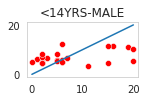

In [ ]:
plt.figure(figsize=(2,1))
x = y_test.values.flatten()
sns.scatterplot(x,y_pred,color="red")
sns.lineplot(x,x)
plt.grid(None)
plt.title("<14YRS-MALE")


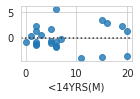

In [ ]:
plt.figure(figsize=(2,1))
sns.residplot(x=y_test, y=y_pred)

In [ ]:
data={
    'MMAX':[30.6,31.1,32.6,33.3,33.6,32.3,30.1,29.6,30.4,33.2,33.3,31.7, 29.4, 30.2, 32, 32.8, 32.4, 29.5, 27.3, 27.2, 28.2, 31, 31.8,30.5],
    'MMIN':[17.1,11,21,23.9,26.2,20,25,24.6,24.3,23.6,21.3,18.8,18.8,19.6,21.7,24,26.2,25.9,24.9,24.5,24.4,24,22.4,20.1],
    'TMRF':[1,1,0,1,12,551,959,623,346,79,10,3,0,1,0,0,27,487,661,459,300,66,6,5],
    'RH':[66,64,64,66,67,50,85,85,82,71,68,66,58,59,60,68,72,83,89,89,89,74,60,57],
    'MWS':[6.5,6.5,7.6,7.6,9.4,11.5,12.2,11.5,4,6.1,5.8,6.1,6,7,7,8,10,12,14,12,7,6,6,6]
}
df = pd.DataFrame(data)
df
df = sc.transform(df)
y_pred = ensemble.predict(df)
y_pred

array([6.73484252, 7.05559045, 7.38949052, 8.93156811, 8.69459651,
       5.6733949 , 7.4858949 , 8.75862217, 9.90256157, 9.13363952,
       9.38197237, 8.17970842, 4.28505378, 6.08762464, 6.71976334,
       6.71235911, 8.53681329, 8.17637109, 7.8608949 , 8.67820259,
       9.9858949 , 7.58113828, 8.87994759, 6.54365261])

In [ ]:
y_pred.sum()

187.36959810535168

**Male 15-24YRS**

In [ ]:
X = dataset.iloc[:,[1,2,3,4,5]]
z = dataset.iloc[:,[7]]

X_train, X_test, z_train, z_test = train_test_split(X, z, 
                        test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Adaboost + Decision Tree
modelAD = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4)
)
modelAD.fit(X_train, z_train)

#Adaboost + Support Vector Regressor
modelSVR = AdaBoostRegressor(
    SVR()
)
modelSVR.fit(X_train, z_train)

#Ensemble Voting Regressor Model
ensemble = VotingRegressor([('dt', modelAD), ('svr', modelSVR)])
ensemble.fit(X_train, z_train)
z_pred = ensemble.predict(X_test)

print("\n Evalutions Metrics")
mae=mean_absolute_error(z_test,z_pred)
print("MAE",mean_absolute_error(z_test,z_pred))
print("RMSE",np.sqrt(mean_squared_error(z_test,z_pred)))
r2 = r2_score(z_test,z_pred)
print("R-squared",r2)

print("\n Hyperparameter Optimization")
scores = cross_val_score(ensemble, X_train, z_train, scoring='neg_mean_absolute_error', cv=4)
mae = absolute(scores)
print("MAE: ", np.mean(mae))
scores = cross_val_score(ensemble, X_train, z_train, scoring='neg_root_mean_squared_error', cv=75)
rmse = absolute(scores)
print("RMSE: ", np.mean(rmse))
scores = cross_val_score(ensemble, X_train, z_train, scoring='r2', cv=3)
print("R-squared: ",scores.mean())





 Evalutions Metrics
MAE 11.001328487157874
RMSE 13.513270387130376
R-squared -0.015515370442396481

 Hyperparameter Optimization
MAE:  12.692892510520274
RMSE:  13.030123257415465
R-squared:  0.06582524142262973


Text(0.5, 1.0, '15-24YRS-MALE')

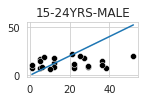

In [ ]:
plt.figure(figsize=(2,1))
x = z_test.values.flatten()
sns.scatterplot(x,z_pred,color="black")
sns.lineplot(x,x)
plt.title("15-24YRS-MALE")

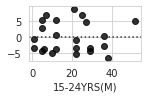

In [ ]:
plt.figure(figsize=(2,1))
sns.residplot(x=z_test, y=z_pred,color="black")

In [ ]:
data={
    'MMAX':[30.6,31.1,32.6,33.3,33.6,32.3,30.1,29.6,30.4,33.2,33.3,31.7, 29.4, 30.2, 32, 32.8, 32.4, 29.5, 27.3, 27.2, 28.2, 31, 31.8,30.5],
    'MMIN':[17.1,11,21,23.9,26.2,20,25,24.6,24.3,23.6,21.3,18.8,18.8,19.6,21.7,24,26.2,25.9,24.9,24.5,24.4,24,22.4,20.1],
    'TMRF':[1,1,0,1,12,551,959,623,346,79,10,3,0,1,0,0,27,487,661,459,300,66,6,5],
    'RH':[66,64,64,66,67,50,85,85,82,71,68,66,58,59,60,68,72,83,89,89,89,74,60,57],
    'MWS':[6.5,6.5,7.6,7.6,9.4,11.5,12.2,11.5,4,6.1,5.8,6.1,6,7,7,8,10,12,14,12,7,6,6,6]
}
df = pd.DataFrame(data)
df
df = sc.transform(df)
z_pred = ensemble.predict(df)
z_pred

array([ 8.62008997, 10.07256162, 10.49075891, 12.32714419, 29.00628513,
       12.95177525, 14.70177525, 14.70177525, 13.50177525, 14.64340552,
       10.7833587 , 10.65558486,  6.91094907,  8.2823708 ,  7.70664512,
       11.08747145, 18.20825082, 15.25733081, 16.2472298 , 16.47955303,
       15.45177526, 15.1104347 , 10.74525174, 10.73024195])

In [ ]:
z_pred.sum()

314.67379443149593

**Male 25-60YRS**

In [ ]:
X = dataset.iloc[:,[1,2,3,4,5]]
a = dataset.iloc[:,[8]]

X_train, X_test, a_train, a_test = train_test_split(X, a, 
                        test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Adaboost + Decision Tree
modelAD = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4)
)
modelAD.fit(X_train, a_train)

#Adaboost + Support Vector Regressor
modelSVR = AdaBoostRegressor(
    SVR()
)
modelSVR.fit(X_train, a_train)

#Ensemble Voting Regressor Model
ensemble = VotingRegressor([('dt', modelAD), ('svr', modelSVR)])
ensemble.fit(X_train, a_train)
a_pred = ensemble.predict(X_test)

print("\n Evalutions Metrics")
mae=mean_absolute_error(a_test,a_pred)
print("MAE",mean_absolute_error(a_test,a_pred))
print("RMSE",np.sqrt(mean_squared_error(a_test,a_pred)))
r2 = r2_score(a_test,a_pred)
print("R-squared",r2)

print("\n Hyperparameter Optimization")
scores = cross_val_score(ensemble, X_train, a_train, scoring='neg_mean_absolute_error', cv=10)
mae = absolute(scores)
print("MAE: ", np.mean(mae))
scores = cross_val_score(ensemble, X_train, a_train, scoring='neg_root_mean_squared_error', cv=45)
rmse = absolute(scores)
print("RMSE: ", np.mean(rmse))
scores = cross_val_score(ensemble, X_train, a_train, scoring='r2', cv=10)
print("R-squared: ",scores.mean())





 Evalutions Metrics
MAE 8.735700863739137
RMSE 10.344416835365355
R-squared 0.16740187000433904

 Hyperparameter Optimization
MAE:  8.704130826296185
RMSE:  9.736587200010234
R-squared:  0.07280978543219357


Text(0.5, 1.0, '25-60YRS-MALE')

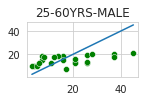

In [ ]:
plt.figure(figsize=(2,1))
x = a_test.values.flatten()
sns.scatterplot(x,a_pred,color="green")
sns.lineplot(x,x)
plt.title("25-60YRS-MALE")

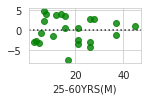

In [ ]:
plt.figure(figsize=(2,1))
sns.residplot(x=a_test, y=a_pred,color="green")

In [ ]:
data={
    'MMAX':[30.6,31.1,32.6,33.3,33.6,32.3,30.1,29.6,30.4,33.2,33.3,31.7, 29.4, 30.2, 32, 32.8, 32.4, 29.5, 27.3, 27.2, 28.2, 31, 31.8,30.5],
    'MMIN':[17.1,11,21,23.9,26.2,20,25,24.6,24.3,23.6,21.3,18.8,18.8,19.6,21.7,24,26.2,25.9,24.9,24.5,24.4,24,22.4,20.1],
    'TMRF':[1,1,0,1,12,551,959,623,346,79,10,3,0,1,0,0,27,487,661,459,300,66,6,5],
    'RH':[66,64,64,66,67,50,85,85,82,71,68,66,58,59,60,68,72,83,89,89,89,74,60,57],
    'MWS':[6.5,6.5,7.6,7.6,9.4,11.5,12.2,11.5,4,6.1,5.8,6.1,6,7,7,8,10,12,14,12,7,6,6,6]
}
df = pd.DataFrame(data)
df
df = sc.transform(df)
a_pred = ensemble.predict(df)
a_pred

array([14.02812751, 14.54263271, 13.87882138, 15.78221383, 20.68005116,
       16.50499409, 18.27772136, 18.75499409, 18.60499409, 17.49013899,
       19.84128965, 17.1372852 , 11.1090201 , 14.25144438, 14.72917304,
       14.43802997, 16.82164869, 18.27772136, 18.27772136, 19.38960947,
       20.25499409, 18.05341775, 18.43860586, 15.02690452])

In [ ]:
a_pred.sum()

404.5915546334921

**Male >60YRS**

In [ ]:
X = dataset.iloc[:,[1,2,3,4,5]]
b = dataset.iloc[:,[9]]

X_train, X_test, b_train, b_test = train_test_split(X, b, 
                        test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Adaboost + Decision Tree
modelAD = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4)
)
modelAD.fit(X_train, b_train)

#Adaboost + Support Vector Regressor
modelSVR = AdaBoostRegressor(
    SVR()
)
modelSVR.fit(X_train, b_train)

#Ensemble Voting Regressor Model
ensemble = VotingRegressor([('dt', modelAD), ('svr', modelSVR)])
ensemble.fit(X_train, b_train)
b_pred = ensemble.predict(X_test)

print("\n Evalutions Metrics")
mae=mean_absolute_error(b_test,b_pred)
print("MAE",mean_absolute_error(b_test,b_pred))
print("RMSE",np.sqrt(mean_squared_error(b_test,b_pred)))
r2 = r2_score(b_test,b_pred)
print("R-squared",r2)

print("\n Hyperparameter Optimization")
scores = cross_val_score(ensemble, X_train, b_train, scoring='neg_mean_absolute_error', cv=20)
mae = absolute(scores)
print("MAE: ", np.mean(mae))
scores = cross_val_score(ensemble, X_train, b_train, scoring='neg_root_mean_squared_error', cv=16)
rmse = absolute(scores)
print("RMSE: ", np.mean(rmse))
scores = cross_val_score(ensemble, X_train, b_train, scoring='r2', cv=5)
print("R-squared: ",scores.mean())





 Evalutions Metrics
MAE 0.8653670494674262
RMSE 1.1084986629328537
R-squared 0.164500061506483

 Hyperparameter Optimization
MAE:  1.063356385190351
RMSE:  1.2335508243018714
R-squared:  -0.18625805894102382


Text(0.5, 1.0, '>60YRS-MALE')

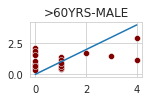

In [ ]:
plt.figure(figsize=(2,1))
x = b_test.values.flatten()
sns.scatterplot(x,b_pred,color="maroon")
sns.lineplot(x,x)
plt.title(">60YRS-MALE")

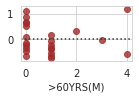

In [ ]:
plt.figure(figsize=(2,1))
sns.residplot(x=b_test, y=b_pred,color="brown")

In [ ]:
data={
    'MMAX':[30.6,31.1,32.6,33.3,33.6,32.3,30.1,29.6,30.4,33.2,33.3,31.7, 29.4, 30.2, 32, 32.8, 32.4, 29.5, 27.3, 27.2, 28.2, 31, 31.8,30.5],
    'MMIN':[17.1,11,21,23.9,26.2,20,25,24.6,24.3,23.6,21.3,18.8,18.8,19.6,21.7,24,26.2,25.9,24.9,24.5,24.4,24,22.4,20.1],
    'TMRF':[1,1,0,1,12,551,959,623,346,79,10,3,0,1,0,0,27,487,661,459,300,66,6,5],
    'RH':[66,64,64,66,67,50,85,85,82,71,68,66,58,59,60,68,72,83,89,89,89,74,60,57],
    'MWS':[6.5,6.5,7.6,7.6,9.4,11.5,12.2,11.5,4,6.1,5.8,6.1,6,7,7,8,10,12,14,12,7,6,6,6]
}
df = pd.DataFrame(data)
df
df = sc.transform(df)
b_pred = ensemble.predict(df)
b_pred

array([1.62641796, 2.14309911, 1.72262939, 1.85019787, 1.13273417,
       1.06010844, 0.78233067, 0.7911026 , 1.09185448, 0.98398246,
       1.47406179, 1.50050335, 1.07706672, 1.53180262, 2.96506606,
       2.4831402 , 1.27843743, 0.83361272, 0.69899733, 0.99899733,
       0.99899733, 1.8414351 , 2.87393481, 1.68748251])

In [ ]:
b_pred.sum()

35.42799246207399

**Female <14YRS**

In [ ]:
X = dataset.iloc[:,[1,2,3,4,5]]
c = dataset.iloc[:,[10]]

X_train, X_test, c_train, c_test = train_test_split(X, c, 
                        test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Adaboost + Decision Tree
modelAD = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4)
)
modelAD.fit(X_train, c_train)

#Adaboost + Support Vector Regressor
modelSVR = AdaBoostRegressor(
    SVR()
)
modelSVR.fit(X_train, c_train)

#Ensemble Voting Regressor Model
ensemble = VotingRegressor([('dt', modelAD), ('svr', modelSVR)])
ensemble.fit(X_train, c_train)
c_pred = ensemble.predict(X_test)

print("\n Evalutions Metrics")
mae=mean_absolute_error(c_test,c_pred)
print("MAE",mean_absolute_error(c_test,c_pred))
print("RMSE",np.sqrt(mean_squared_error(c_test,c_pred)))
r2 = r2_score(c_test,c_pred)
print("R-squared",r2)

print("\n Hyperparameter Optimization")
scores = cross_val_score(ensemble, X_train, c_train, scoring='neg_mean_absolute_error', cv=5)
mae = absolute(scores)
print("MAE: ", np.mean(mae))
scores = cross_val_score(ensemble, X_train, c_train, scoring='neg_root_mean_squared_error', cv=25)
rmse = absolute(scores)
print("RMSE: ", np.mean(rmse))
scores = cross_val_score(ensemble, X_train, c_train, scoring='r2', cv=5)
print("R-squared: ",scores.mean())





 Evalutions Metrics
MAE 3.0200441218568357
RMSE 3.994395474278478
R-squared -0.25711919323970056

 Hyperparameter Optimization
MAE:  2.832007546869172
RMSE:  3.015029961627495
R-squared:  -0.03863983379978533


Text(0.5, 1.0, '<14YRS-FEMALE')

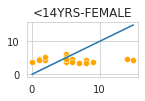

In [ ]:
plt.figure(figsize=(2,1))
x = c_test.values.flatten()
sns.scatterplot(x,c_pred,color="orange")
sns.lineplot(x,x)
plt.title("<14YRS-FEMALE")

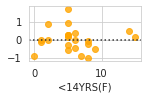

In [ ]:
plt.figure(figsize=(2,1))
sns.residplot(x=c_test, y=c_pred,color="orange")

In [ ]:
data={
    'MMAX':[30.6,31.1,32.6,33.3,33.6,32.3,30.1,29.6,30.4,33.2,33.3,31.7, 29.4, 30.2, 32, 32.8, 32.4, 29.5, 27.3, 27.2, 28.2, 31, 31.8,30.5],
    'MMIN':[17.1,11,21,23.9,26.2,20,25,24.6,24.3,23.6,21.3,18.8,18.8,19.6,21.7,24,26.2,25.9,24.9,24.5,24.4,24,22.4,20.1],
    'TMRF':[1,1,0,1,12,551,959,623,346,79,10,3,0,1,0,0,27,487,661,459,300,66,6,5],
    'RH':[66,64,64,66,67,50,85,85,82,71,68,66,58,59,60,68,72,83,89,89,89,74,60,57],
    'MWS':[6.5,6.5,7.6,7.6,9.4,11.5,12.2,11.5,4,6.1,5.8,6.1,6,7,7,8,10,12,14,12,7,6,6,6]
}
df = pd.DataFrame(data)
df
df = sc.transform(df)
c_pred = ensemble.predict(df)
c_pred

array([2.29449371, 2.37779584, 2.45019254, 5.00155205, 6.44937433,
       2.81908753, 3.47277813, 3.47277813, 3.61618898, 4.40549808,
       6.41814653, 2.51303372, 1.8202053 , 2.22116021, 3.43202271,
       4.27480045, 5.49031739, 3.47277813, 5.44952232, 5.44952232,
       5.24952232, 4.15260173, 6.44900242, 3.4899739 ])

In [ ]:
c_pred.sum()

96.24234877655505

**Female 15-24YRS** 

In [ ]:
X = dataset.iloc[:,[1,2,3,4,5]]
d = dataset.iloc[:,[11]]

X_train, X_test, d_train, d_test = train_test_split(X, d, 
                        test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Adaboost + Decision Tree
modelAD = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4)
)
modelAD.fit(X_train, d_train)

#Adaboost + Support Vector Regressor
modelSVR = AdaBoostRegressor(
    SVR()
)
modelSVR.fit(X_train, d_train)

#Ensemble Voting Regressor Model
ensemble = VotingRegressor([('dt', modelAD), ('svr', modelSVR)])
ensemble.fit(X_train, d_train)
d_pred = ensemble.predict(X_test)

print("\n Evalutions Metrics")
mae=mean_absolute_error(d_test,d_pred)
print("MAE",mean_absolute_error(d_test,d_pred))
print("RMSE",np.sqrt(mean_squared_error(d_test,d_pred)))
r2 = r2_score(d_test,d_pred)
print("R-squared",r2)

print("\n Hyperparameter Optimization")
scores = cross_val_score(ensemble, X_train, d_train, scoring='neg_mean_absolute_error', cv=30)
mae = absolute(scores)
print("MAE: ", np.mean(mae))
scores = cross_val_score(ensemble, X_train, d_train, scoring='neg_root_mean_squared_error', cv=10)
rmse = absolute(scores)
print("RMSE: ", np.mean(rmse))
scores = cross_val_score(ensemble, X_train, d_train, scoring='r2', cv=4)
print("R-squared: ",scores.mean())


 Evalutions Metrics
MAE 2.8278944395298096
RMSE 3.2900250946413525
R-squared 0.24318844167821208

 Hyperparameter Optimization
MAE:  3.169023225805776
RMSE:  3.7900488806485355
R-squared:  0.030785098991603754


Text(0.5, 1.0, '15-24YRS-FEMALE')

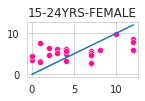

In [ ]:
plt.figure(figsize=(2,1))
x = d_test.values.flatten()
sns.scatterplot(x,d_pred,color="deeppink")
sns.lineplot(x,x)
plt.title("15-24YRS-FEMALE")

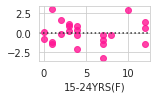

In [ ]:
plt.figure(figsize=(2,1))
sns.residplot(x=d_test, y=d_pred, color="deeppink")

In [ ]:
data={
    'MMAX':[30.6,31.1,32.6,33.3,33.6,32.3,30.1,29.6,30.4,33.2,33.3,31.7, 29.4, 30.2, 32, 32.8, 32.4, 29.5, 27.3, 27.2, 28.2, 31, 31.8,30.5],
    'MMIN':[17.1,11,21,23.9,26.2,20,25,24.6,24.3,23.6,21.3,18.8,18.8,19.6,21.7,24,26.2,25.9,24.9,24.5,24.4,24,22.4,20.1],
    'TMRF':[1,1,0,1,12,551,959,623,346,79,10,3,0,1,0,0,27,487,661,459,300,66,6,5],
    'RH':[66,64,64,66,67,50,85,85,82,71,68,66,58,59,60,68,72,83,89,89,89,74,60,57],
    'MWS':[6.5,6.5,7.6,7.6,9.4,11.5,12.2,11.5,4,6.1,5.8,6.1,6,7,7,8,10,12,14,12,7,6,6,6]
}
df = pd.DataFrame(data)
df
df = sc.transform(df)
d_pred = ensemble.predict(df)
d_pred

array([5.00383798, 5.46821824, 3.97028395, 6.67261742, 7.3254946 ,
       5.26226116, 3.98953389, 4.61453389, 4.88953389, 8.33906177,
       7.17333711, 6.92588016, 2.9887546 , 4.77113119, 5.70570136,
       6.04537839, 6.78621874, 5.26226116, 4.87842278, 4.15620055,
       4.88953389, 5.79483968, 7.51217495, 6.54008031])

In [ ]:
d_pred.sum()

134.96529163316777

**Female 25-60YRS**

In [ ]:
X = dataset.iloc[:,[1,2,3,4,5]]
e = dataset.iloc[:,[12]]

X_train, X_test, e_train, e_test = train_test_split(X, e, 
                        test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Adaboost + Decision Tree
modelAD = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4)
)
modelAD.fit(X_train, e_train)

#Adaboost + Support Vector Regressor
modelSVR = AdaBoostRegressor(
    SVR()
)
modelSVR.fit(X_train, e_train)

#Ensemble Voting Regressor Model
ensemble = VotingRegressor([('dt', modelAD), ('svr', modelSVR)])
ensemble.fit(X_train, e_train)
e_pred = ensemble.predict(X_test)

print("\n Evalutions Metrics")
mae=mean_absolute_error(e_test,e_pred)
print("MAE",mean_absolute_error(e_test,e_pred))
print("RMSE",np.sqrt(mean_squared_error(e_test,e_pred)))
r2 = r2_score(e_test,e_pred)
print("R-squared",r2)


print("\n Hyperparameter Optimization")
scores = cross_val_score(ensemble, X_train, e_train, scoring='neg_mean_absolute_error', cv=5)
mae = absolute(scores)
print("MAE: ", np.mean(mae))
scores = cross_val_score(ensemble, X_train, e_train, scoring='neg_root_mean_squared_error', cv=25)
rmse = absolute(scores)
print("RMSE: ", np.mean(rmse))
scores = cross_val_score(ensemble, X_train, e_train, scoring='r2', cv=5)
print("R-squared: ",scores.mean())


 Evalutions Metrics
MAE 4.438586470379314
RMSE 5.8172744766942746
R-squared 0.17457944686563598

 Hyperparameter Optimization
MAE:  5.5305671605963855
RMSE:  6.580750293953447
R-squared:  -0.14578529325646739


Text(0.5, 1.0, '25-60YRS-FEMALE')

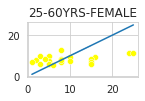

In [ ]:
plt.figure(figsize=(2,1))
x = e_test.values.flatten()
sns.scatterplot(x,e_pred,color="yellow")
sns.lineplot(x,x)
plt.title("25-60YRS-FEMALE")

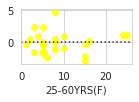

In [ ]:
plt.figure(figsize=(2,1))
sns.residplot(x=e_test, y=e_pred,color="yellow")

In [ ]:
data={
    'MMAX':[30.6,31.1,32.6,33.3,33.6,32.3,30.1,29.6,30.4,33.2,33.3,31.7, 29.4, 30.2, 32, 32.8, 32.4, 29.5, 27.3, 27.2, 28.2, 31, 31.8,30.5],
    'MMIN':[17.1,11,21,23.9,26.2,20,25,24.6,24.3,23.6,21.3,18.8,18.8,19.6,21.7,24,26.2,25.9,24.9,24.5,24.4,24,22.4,20.1],
    'TMRF':[1,1,0,1,12,551,959,623,346,79,10,3,0,1,0,0,27,487,661,459,300,66,6,5],
    'RH':[66,64,64,66,67,50,85,85,82,71,68,66,58,59,60,68,72,83,89,89,89,74,60,57],
    'MWS':[6.5,6.5,7.6,7.6,9.4,11.5,12.2,11.5,4,6.1,5.8,6.1,6,7,7,8,10,12,14,12,7,6,6,6]
}
df = pd.DataFrame(data)
df
df = sc.transform(df)
e_pred = ensemble.predict(df)
e_pred

array([ 5.95095299,  6.74084964,  6.71930368,  7.7503888 , 15.59286963,
        8.23250938,  7.95274748,  8.73846176,  9.15750938, 10.32134327,
       10.51183928, 10.20043001,  5.95975238,  6.32833029,  6.30730147,
        7.97115271, 14.06495583,  8.62417605, 10.12139827, 10.35750938,
        9.29340682, 10.57404957, 10.61105704,  9.92760496])

In [ ]:
e_pred.sum()

218.00990008385102

**Female > 60YRS**

In [ ]:
X = dataset.iloc[:,[1,2,3,4,5]]
f = dataset.iloc[:,[13]]

X_train, X_test, f_train, f_test = train_test_split(X, f, 
                        test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Adaboost + Decision Tree
modelAD = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4)
)
modelAD.fit(X_train, f_train)

#Adaboost + Support Vector Regressor
modelSVR = AdaBoostRegressor(
    SVR()
)
modelSVR.fit(X_train, f_train)

#Ensemble Voting Regressor Model
ensemble = VotingRegressor([('dt', modelAD), ('svr', modelSVR)])
ensemble.fit(X_train, f_train)
f_pred = ensemble.predict(X_test)

print("\n Evalutions Metrics")
mae=mean_absolute_error(f_test,f_pred)
print("MAE",mean_absolute_error(f_test,f_pred))
print("RMSE",np.sqrt(mean_squared_error(f_test,f_pred)))
r2 = r2_score(f_test,f_pred)
print("R-squared",r2)

print("\n Hyperparameter Optimization")
scores = cross_val_score(ensemble, X_train, f_train, scoring='neg_mean_absolute_error', cv=5)
mae = absolute(scores)
print("MAE: ", np.mean(mae))
scores = cross_val_score(ensemble, X_train, f_train, scoring='neg_root_mean_squared_error', cv=20)
rmse = absolute(scores)
print("RMSE: ", np.mean(rmse))
scores = cross_val_score(ensemble, X_train, f_train, scoring='r2', cv=5)
print("R-squared: ",scores.mean())


 Evalutions Metrics
MAE 0.774751414586886
RMSE 1.0186055380078987
R-squared -0.2944994836083268

 Hyperparameter Optimization
MAE:  0.755408490867999
RMSE:  0.8831335260267602
R-squared:  -0.4586236021460103


Text(0.5, 1.0, '>60YRS-FEMALE')

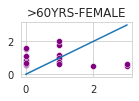

In [ ]:
plt.figure(figsize=(2,1))
x = f_test.values.flatten()
sns.scatterplot(x,f_pred,color="purple")
sns.lineplot(x,x)
plt.title(">60YRS-FEMALE")

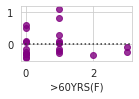

In [ ]:
plt.figure(figsize=(2,1))
sns.residplot(x=f_test, y=f_pred,color="purple")

In [ ]:
data={
    'MMAX':[30.6,31.1,32.6,33.3,33.6,32.3,30.1,29.6,30.4,33.2,33.3,31.7, 29.4, 30.2, 32, 32.8, 32.4, 29.5, 27.3, 27.2, 28.2, 31, 31.8,30.5],
    'MMIN':[17.1,11,21,23.9,26.2,20,25,24.6,24.3,23.6,21.3,18.8,18.8,19.6,21.7,24,26.2,25.9,24.9,24.5,24.4,24,22.4,20.1],
    'TMRF':[1,1,0,1,12,551,959,623,346,79,10,3,0,1,0,0,27,487,661,459,300,66,6,5],
    'RH':[66,64,64,66,67,50,85,85,82,71,68,66,58,59,60,68,72,83,89,89,89,74,60,57],
    'MWS':[6.5,6.5,7.6,7.6,9.4,11.5,12.2,11.5,4,6.1,5.8,6.1,6,7,7,8,10,12,14,12,7,6,6,6]
}
df = pd.DataFrame(data)
df
df = sc.transform(df)
f_pred = ensemble.predict(df)
f_pred

array([0.67074895, 0.69472274, 0.43381822, 0.97481709, 1.14287117,
       0.70068735, 0.78402068, 0.78402068, 0.90902068, 0.94812937,
       1.05142365, 0.71965664, 0.45619568, 0.53206385, 0.42341559,
       0.57802458, 1.4629057 , 0.78402068, 0.77998842, 0.78402068,
       0.70902068, 0.82363887, 0.88784656, 0.6205696 ])

In [ ]:
f_pred.sum()

18.65564810058267

In [ ]:
y_pred[0]+z_pred[0]+a_pred[0]+b_pred[0]+c_pred[0]+d_pred[0]+e_pred[0]+f_pred[0]

44.92951158953388

In [ ]:
y_pred[1]+z_pred[1]+a_pred[1]+b_pred[1]+c_pred[1]+d_pred[1]+e_pred[1]+f_pred[1]

49.09547035245561

In [ ]:
y_pred[2]+z_pred[2]+a_pred[2]+b_pred[2]+c_pred[2]+d_pred[2]+e_pred[2]+f_pred[2]

47.055298592276216

In [ ]:
y_pred[3]+z_pred[3]+a_pred[3]+b_pred[3]+c_pred[3]+d_pred[3]+e_pred[3]+f_pred[3]

59.290499356938454

In [ ]:
y_pred[4]+z_pred[4]+a_pred[4]+b_pred[4]+c_pred[4]+d_pred[4]+e_pred[4]+f_pred[4]

90.02427669948266

In [ ]:
y_pred[5]+z_pred[5]+a_pred[5]+b_pred[5]+c_pred[5]+d_pred[5]+e_pred[5]+f_pred[5]

53.20481810327937

In [ ]:
y_pred[6]+z_pred[6]+a_pred[6]+b_pred[6]+c_pred[6]+d_pred[6]+e_pred[6]+f_pred[6]

57.446802350635195

In [ ]:
y_pred[7]+z_pred[7]+a_pred[7]+b_pred[7]+c_pred[7]+d_pred[7]+e_pred[7]+f_pred[7]

60.61628856617404

In [ ]:
y_pred[8]+z_pred[8]+a_pred[8]+b_pred[8]+c_pred[8]+d_pred[8]+e_pred[8]+f_pred[8]

61.673438311573754

In [ ]:
y_pred[9]+z_pred[9]+a_pred[9]+b_pred[9]+c_pred[9]+d_pred[9]+e_pred[9]+f_pred[9]

66.26519899771375

In [ ]:
y_pred[10]+z_pred[10]+a_pred[10]+b_pred[10]+c_pred[10]+d_pred[10]+e_pred[10]+f_pred[10]

66.63542908673234

In [ ]:
y_pred[11]+z_pred[11]+a_pred[11]+b_pred[11]+c_pred[11]+d_pred[11]+e_pred[11]+f_pred[11]

57.83208237353137

In [ ]:
y_pred[12]+z_pred[12]+a_pred[12]+b_pred[12]+c_pred[12]+d_pred[12]+e_pred[12]+f_pred[12]

34.60699762174754

In [ ]:
y_pred[13]+z_pred[13]+a_pred[13]+b_pred[13]+c_pred[13]+d_pred[13]+e_pred[13]+f_pred[13]

44.00592796492482

In [ ]:
y_pred[14]+z_pred[14]+a_pred[14]+b_pred[14]+c_pred[14]+d_pred[14]+e_pred[14]+f_pred[14]

47.989088694552095

In [ ]:
y_pred[15]+z_pred[15]+a_pred[15]+b_pred[15]+c_pred[15]+d_pred[15]+e_pred[15]+f_pred[15]

53.59035687016445

In [ ]:
y_pred[16]+z_pred[16]+a_pred[16]+b_pred[16]+c_pred[16]+d_pred[16]+e_pred[16]+f_pred[16]

72.64954788653698

In [ ]:
y_pred[17]+z_pred[17]+a_pred[17]+b_pred[17]+c_pred[17]+d_pred[17]+e_pred[17]+f_pred[17]

60.68827199210484

In [ ]:
y_pred[18]+z_pred[18]+a_pred[18]+b_pred[18]+c_pred[18]+d_pred[18]+e_pred[18]+f_pred[18]

64.31417517327809

In [ ]:
y_pred[19]+z_pred[19]+a_pred[19]+b_pred[19]+c_pred[19]+d_pred[19]+e_pred[19]+f_pred[19]

66.29361535675052

In [ ]:
y_pred[20]+z_pred[20]+a_pred[20]+b_pred[20]+c_pred[20]+d_pred[20]+e_pred[20]+f_pred[20]

66.83314527691823

In [ ]:
y_pred[21]+z_pred[21]+a_pred[21]+b_pred[21]+c_pred[21]+d_pred[21]+e_pred[21]+f_pred[21]

63.931555669153596

In [ ]:
y_pred[22]+z_pred[22]+a_pred[22]+b_pred[22]+c_pred[22]+d_pred[22]+e_pred[22]+f_pred[22]

66.39782097462579

In [ ]:
y_pred[23]+z_pred[23]+a_pred[23]+b_pred[23]+c_pred[23]+d_pred[23]+e_pred[23]+f_pred[23]

54.566510365486664

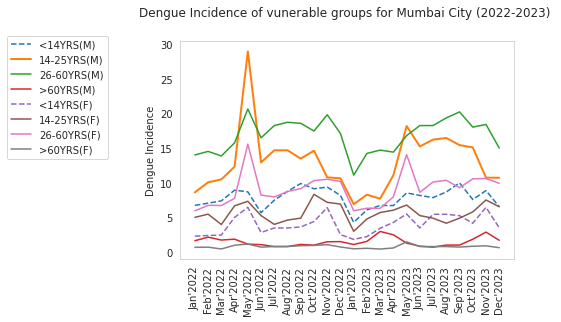

In [ ]:
mon = ['Jan\'2022','Feb\'2022','Mar\'2022','Apr\'2022','May\'2022','Jun\'2022','Jul\'2022','Aug\'2022','Sep\'2022','Oct\'2022','Nov\'2022','Dec\'2022','Jan\'2023','Feb\'2023','Mar\'2023','Apr\'2023','May\'2023','Jun\'2023','Jul\'2023','Aug\'2023','Sep\'2023','Oct\'2023','Nov\'2023','Dec\'2023']
sns.set_style("whitegrid")
plt.xticks(rotation=90)
plt.ylabel("Dengue Incidence")
fig = sns.lineplot(mon, y_pred, label = "<14YRS(M)", linestyle='dashed')
fig = sns.lineplot(mon, z_pred, label = "14-25YRS(M)", linewidth=2)
fig = sns.lineplot(mon, a_pred, label = "26-60YRS(M)")
fig = sns.lineplot(mon, b_pred, label = ">60YRS(M)")
fig = sns.lineplot(mon, c_pred, label = "<14YRS(F)", linestyle='dashed')
fig = sns.lineplot(mon, d_pred, label = "14-25YRS(F)")
fig = sns.lineplot(mon, e_pred, label = "26-60YRS(F)")
fig = sns.lineplot(mon, f_pred, label = ">60YRS(F)")
plt.grid(None)
plt.legend(bbox_to_anchor=(-0.2, 1.05))
plt.title("Dengue Incidence of vunerable groups for Mumbai City (2022-2023) \n", pad=10)
plt.show()

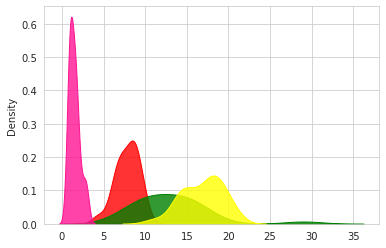

In [ ]:
fig = sns.kdeplot(y_pred, shade=True, color="red", alpha=.8)
fig = sns.kdeplot(z_pred, shade=True, color="green", alpha=.8)
fig = sns.kdeplot(a_pred, shade=True, color="yellow", alpha=.8)
fig = sns.kdeplot(b_pred, shade=True, color="deeppink", alpha=.8)
plt.show()

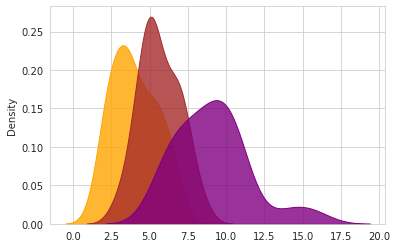

In [ ]:
fig = sns.kdeplot(c_pred, shade=True, color="orange", alpha=.8)
fig = sns.kdeplot(d_pred, shade=True, color="brown", alpha=.8)
fig = sns.kdeplot(e_pred, shade=True, color="purple", alpha=.8)
# fig = sns.kdeplot(f_pred, shade=True, color="maroon", alpha=.8)

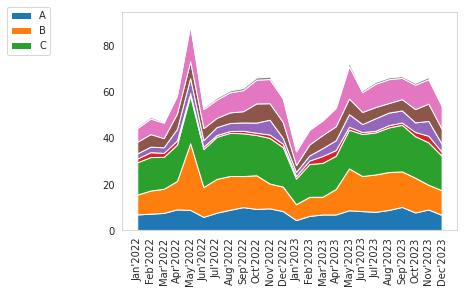

In [ ]:
plt.xticks(rotation=90)
plt.grid(None)
plt.stackplot(mon,y_pred, z_pred, a_pred, b_pred, c_pred, d_pred, e_pred, f_pred, labels=['A','B','C'])
plt.legend(bbox_to_anchor=(-0.2, 1.05))
